# Proyecto 1 - Introducción al Reconocimiento de Patrones
Reconocedor de números escritos a mano por medio de redes neuronales

Se sugiere correr todas las celdas

Bibliotecas necesarias para correr el notebook: `tensorflow, matplotlib, numpy, pandas`

In [1]:
# Para la red neuronal
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Para procesamiento de imágenes
import os
from random import choice
import cv2 as cv

# Para mostrar los resultados de forma más legible
import pandas as pd
from IPython.display import display
import seaborn as sn

Se generan las listas con los datos de entrenamiento y de prueba

In [2]:
X_train = []
y_train = []
X_test = []
y_test = []

def splitImages():
    print("\nSeparando imagenes...")

    for dir in os.listdir("numbers"):
        print(f"Procesando directorio: {dir}")
        numbers = os.listdir(f"numbers/{dir}")
        amount = int(len(numbers)*0.3)

        # save test images
        for i in range(amount):
            digit = choice(numbers)
            numbers.remove(digit)
            image = cv.imread(f"numbers/{dir}/{digit}", 0)
            X_test.append(image)
            y_test.append(int(dir))

        # save train images
        for file in numbers:
            image = cv.imread(f"numbers/{dir}/{file}", 0)
            X_train.append(image)
            y_train.append(int(dir))
splitImages()


Separando imagenes...
Procesando directorio: 0
Procesando directorio: 1
Procesando directorio: 2
Procesando directorio: 3
Procesando directorio: 4
Procesando directorio: 5
Procesando directorio: 6
Procesando directorio: 7
Procesando directorio: 8
Procesando directorio: 9


Se convierten los arreglos de características y clases a arreglos de numpy para poder aprovechar las funcionalidades que estos ofrecen

In [3]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

Los arreglos de características estan compuestos por los píxeles de las imágenes que tienen valores en el rango de 0 a 255, dividiendo cada valor en estos arreglos entre 255, nos aseguramos que los valores se encuentren ahora dentro del rango de 0 a 1, con el objetivo de alcanzar una mayor precisión en el reconocedor, ya que existe una menor dispersión en los valores

In [4]:
X_train = X_train / 255
X_test = X_test / 255

Se muestra las dimensiones de cada arreglo, los arreglos de entrenamiento son matrices de tamaño 67x50, mientras que el vector de etiquetas es unidemensional, ya que a cada imagen se le asocia una única etiqueta 

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4649, 67, 50), (4649,), (1980, 67, 50), (1980,))

In [6]:
# Conjunto de capas que tiene la red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(67, 50)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
146/146 [==============================] - 0s 1ms/step - loss: 0.3882 - accuracy: 0.8866
Epoch 2/5
146/146 [==============================] - 0s 1ms/step - loss: 0.1158 - accuracy: 0.9686
Epoch 3/5
146/146 [==============================] - 0s 1ms/step - loss: 0.0595 - accuracy: 0.9869
Epoch 4/5
146/146 [==============================] - 0s 1ms/step - loss: 0.0388 - accuracy: 0.9925
Epoch 5/5
146/146 [==============================] - 0s 1ms/step - loss: 0.0225 - accuracy: 0.9961


In [38]:
model.evaluate(X_test, y_test)

62/62 [==============================] - 0s 864us/step - loss: 0.1146 - accuracy: 0.9707


[0.1146160438656807, 0.9707070589065552]

62/62 [==============================] - 0s 875us/step


,Total,Correct,%
Actual,,,
0,198,197,99.494949
1,198,195,98.484848
2,198,196,98.989899
3,198,195,98.484848
4,198,188,94.949495
5,198,194,97.979798
6,198,196,98.989899
7,198,188,94.949495
8,198,191,96.464646


Text(95.72222222222221, 0.5, 'Truth')

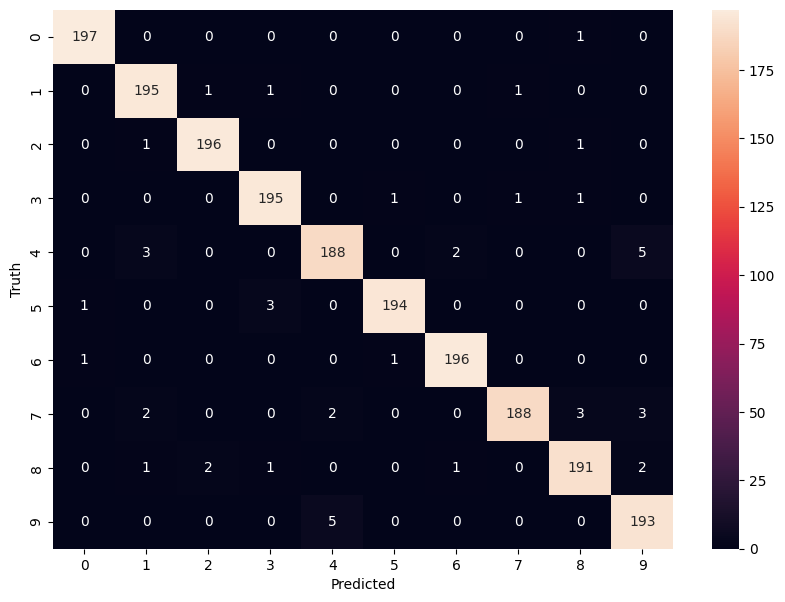

In [7]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

# Show % of correct predictions for each digit
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted_labels})
df1 = df.groupby('Actual').count()
df2 = df[df.Actual == df.Predicted].groupby('Actual').count()
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['Total', 'Correct']
df3['%'] = df3['Correct'] / df3['Total'] * 100
display(df3)

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Ejemplo del modelo prediciendo un número aleatorio

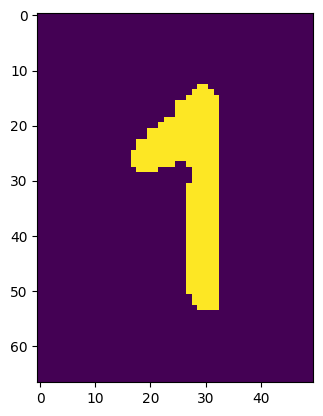

62/62 [==============================] - 0s 797us/step
Number is: 1
...Actual: 1


,0,1,2,3,4,5,6,7,8,9
0,0.00098,0.999987,0.016382,0.253145,0.38763,0.490886,0.028533,0.310144,0.870979,0.809372


In [12]:
def predict_random():
    i = np.random.randint(0, len(X_test))
    plt.imshow(X_test[i])
    plt.show()
    prediction = model.predict(X_test)[i]
    print("Number is:", np.argmax(prediction))
    print("...Actual:", y_test[i])
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    df = pd.DataFrame([prediction], columns=[f"{i}" for i in range(10)])
    display(df)

predict_random()

Se puede también utilizar dígitos que no forman parte del dataset con el que se entrenó y validó la red neuronal gracias al uso de la función `predict_image`

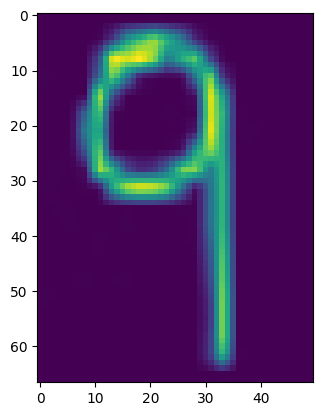

1/1 [==============================] - 0s 14ms/step
Number is: 9


,0,1,2,3,4,5,6,7,8,9
0,0.020181,0.584506,0.318167,0.549199,0.777663,0.495194,0.028664,0.489602,0.342765,0.999667


In [19]:
def predict_image(img, black_number=False):
    img = cv.imread(img, 0)
    img = cv.resize(img, (50, 67))

    if black_number:
        img = cv.bitwise_not(img)
        
    img = img / 255

    img = np.array(img)

    # print(img)
    plt.imshow(img)
    plt.show()

    img = np.expand_dims(img, axis=0)
    
    predict = model.predict(img)
    print("Number is:", np.argmax(predict))
    
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    df = pd.DataFrame(predict, columns=[f"{i}" for i in range(10)])
    
    display(df)

predict_image("9Ale.jpg", True)